In [1]:
import pandas as pd
import rivalry as rv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
#from initialparameters.txt
p = {}
p['beta']=1.42528
p['alpha']=0
p['gamma'] = 2.07703
p['tau_a']=1248.0
p['tau_u']=10
p['sigma']=0.0419821
p['mu']=0.9
p['ks']=0.1918590
p['kc']=0.00253604
p['kb'] = 0.109369

#S = [p[5] + p[6]*C;p[5] - p[6]*C;p[7]]

In [4]:
#ip = pd.Series(p)
#ip.to_pickle('IP.pkl')
#ip

In [2]:
p1 = pd.read_pickle('IP1.pkl')

In [4]:
tot=500000
tpre=6000
dt = 1

In [5]:
#unpack fixed parameters
param = p1
beta = param['beta']
alpha = param['alpha']
gamma = param['gamma']
tau_a = param['tau_a']
sigma = param['sigma']
mu = param['mu']
tau_u = param['tau_u']

#input stimulus
contrast = [0.0,1.0,2.0,3.0,4.0]
r = contrast[4]
ks = param['ks']
kc = param['kc']
kb = param['kb']
k1 = rv.stimulus(ks,kc,r)
k2 = rv.stimulus(ks,kc,-r)#weaker stimulus

tf = tot
equil = tpre
totaltime= tf + equil

#system variables
U = np.random.uniform(0,1,(2,2))
A = np.random.uniform(0,1,(2,1))
Z = np.random.uniform(0,1,(2,1))

u1 = []
u2 = []
a1 = []
a2 = []
z1 = []
z2 = []
t = []
i=-1

In [6]:
print U
print A
print Z

[[ 0.37899421  0.72236833]
 [ 0.57899864  0.58060913]]
[[ 0.77550228]
 [ 0.56939118]]
[[ 0.6797231 ]
 [ 0.79876975]]


In [7]:
while i < totaltime:
    i += 1
    t.append(i*dt)
    stim_on = int(equil<i)
    S1 = k1*stim_on
    S2 = k2*stim_on
    Z[0,0] = Z[0,0] -dt*(Z[0,0] + np.sqrt(dt)*sigma*np.random.randn())
    Z[1,0] = Z[1,0] -dt*(Z[1,0] + np.sqrt(dt)*sigma*np.random.randn())
    
    U[0,1] = U[0,0]+dt*(-U[0,0]+rv.gain_pl_sqrt(kb+S1 - beta*A[1,0]*U[1,0] +alpha*U[0,0] + Z[0,0]*(1+mu*U[0,0])))/tau_u
    U[1,1] = U[1,0]+dt*(-U[1,0]+rv.gain_pl_sqrt(kb+S2 - beta*A[0,0]*U[0,0] +alpha*U[0,1] + Z[1,0]*(1+mu*U[1,0])))/tau_u
    U[0,0] = U[0,1]
    U[1,0] = U[1,1]

    A[0,0] = A[0,0] + dt*(1 - A[0,0] - gamma*A[0,0]*U[0,0])/tau_a
    A[1,0] = A[1,0] + dt*(1 - A[1,0] - gamma*A[1,0]*U[1,0])/tau_a

    u1.append(U[0,0])
    u2.append(U[1,0])
    a1.append(A[0,0])
    a2.append(A[1,0])
    z1.append(Z[0,0])
    z2.append(Z[1,0])

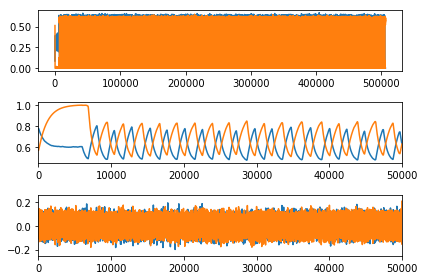

In [8]:
xmax=50000
fig, axs = plt.subplots(3,1)
axs[0].plot(t,u1,t,u2)
#axs[0].set_xlim(100000,200000)
axs[1].plot(t,a1,t,a2)
axs[1].set_xlim(0,xmax)
axs[2].plot(t,z1,t,z2)
axs[2].set_xlim(0,xmax)
fig.tight_layout()

In [9]:
DOM1 = []
DOM2 = []
LEADER = []

In [10]:
td1 = rv.dominance(t,u1,u2,equil)
td2 = rv.dominance(t,u2,u1,equil)

DOM1.extend(td1)
DOM2.extend(td2)

TD1 = np.array(DOM1)
TD2 = np.array(DOM2)

In [61]:
FINAL_DATA = {}
#FINAL_DATA['FIRST_EPOCH_PROB'] = rv.prob_seq(LEADER,1)
FINAL_DATA['MEAN_U1'] = np.mean(TD1)
FINAL_DATA['MEAN_U2'] = np.mean(TD2)
FINAL_DATA['SD_U1'] = np.std(TD1)
FINAL_DATA['SD_U2'] = np.std(TD2)
FINAL_DATA['CV_U1'] = FINAL_DATA['SD_U1']/FINAL_DATA['MEAN_U1']
FINAL_DATA['CV_U2'] = FINAL_DATA['SD_U2']/FINAL_DATA['MEAN_U2']

In [62]:
FINAL_DATA

{'CV_U1': 0.9365988909031534,
 'CV_U2': 0.1527442715863547,
 'MEAN_U1': 80053.666666666672,
 'MEAN_U2': 2342.0,
 'SD_U1': 74978.17541273075,
 'SD_U2': 357.7270840552427}

In [11]:
import model as model

In [35]:
#pmi = model.run(p,1,500)

rivalry:warning: dom found < 3
rivalry:warning: dom found < 3


In [12]:
pm1 = model.run(p1,1,500)

In [15]:
#pmi['CV_U1']=pmi['SD_U1']/pmi['MEAN_U1']
#pmi['CV_U2']=pmi['SD_U2']/pmi['MEAN_U2']
#pmi

In [14]:
pm1['CV_U1']=pm1['SD_U1']/pm1['MEAN_U1']
pm1['CV_U2']=pm1['SD_U2']/pm1['MEAN_U2']
pm1

,COUNTS_U1,COUNTS_U2,FIRST_EPOCH_PROB_U1,FIRST_EPOCH_PROB_U2,MEAN_U1,MEAN_U2,SD_U1,SD_U2,CV_U1,CV_U2
0,244.0,256.0,0.488,0.512,1142.313364,1134.760369,279.057290,275.746591,0.244291,0.243000
20,287.0,213.0,0.574,0.426,1157.773756,1084.972851,317.366573,293.237382,0.274118,0.270272
40,332.0,168.0,0.664,0.336,1228.976744,1066.421296,303.727562,259.362240,0.247139,0.243208
60,348.0,152.0,0.696,0.304,1268.102326,1033.362791,340.301123,270.931397,0.268355,0.262184
80,371.0,129.0,0.742,0.258,1311.605634,1002.032710,358.020030,264.409382,0.272963,0.263873
